In [1]:
%matplotlib inline

In [119]:
import numpy as np
import matplotlib.pyplot as plt

from sgmrc.sgmcoint.common import is_nonstationary
from sgmrc.sgmcoint.space import johansen, normalise
from sgmrc.sgmcoint.simulation import dgp2
from sgmrc.sgmcoint.projection import project, interpolate

In [3]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (16, 8)

In [5]:
def space(X):
    b = johansen(X, 2)
    return b / np.sum(np.abs(b), axis=0)

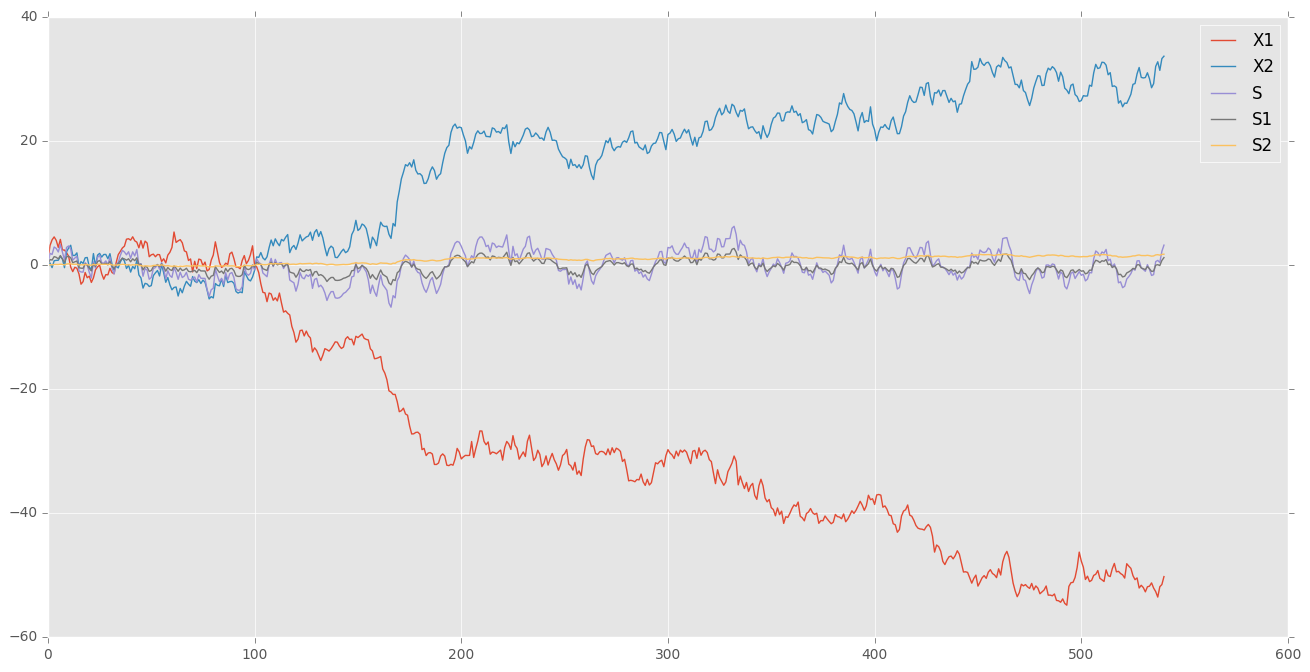

In [6]:
X, beta = dgp2(2, 1, eigen_adjust=0.9)

plt.plot(X)
plt.plot(project(X, space=beta))
plt.plot(project(X, space=johansen(X, 2)))
plt.legend(['X1', 'X2', 'S', 'S1', 'S2'])

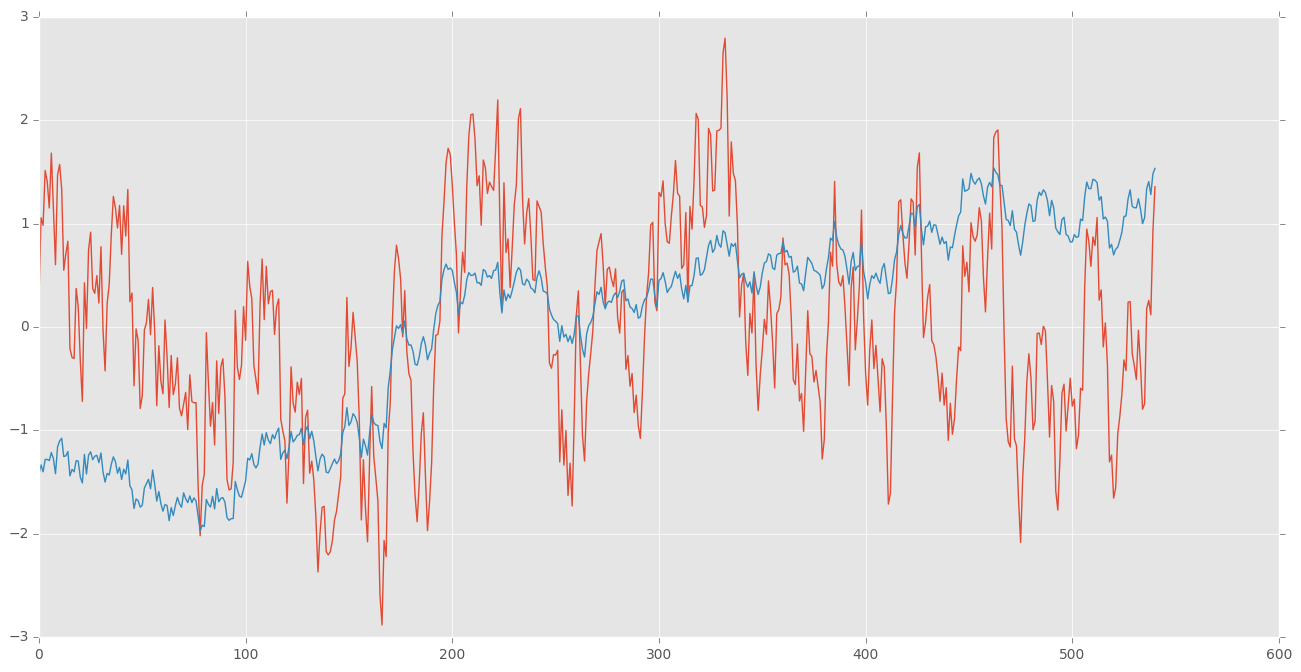

In [7]:
spreads = project(X, johansen(X, 2))
plt.plot((spreads - np.mean(spreads, axis=0)) / np.std(spreads, axis=0))

In [8]:
((spreads - np.mean(spreads, axis=0)) / np.std(spreads, axis=0))[-1, :]

array([ 1.35640232,  1.53362727])

In [9]:
johansen(X, 2)[:, 1]

array([ 0.0062281 ,  0.06046558])

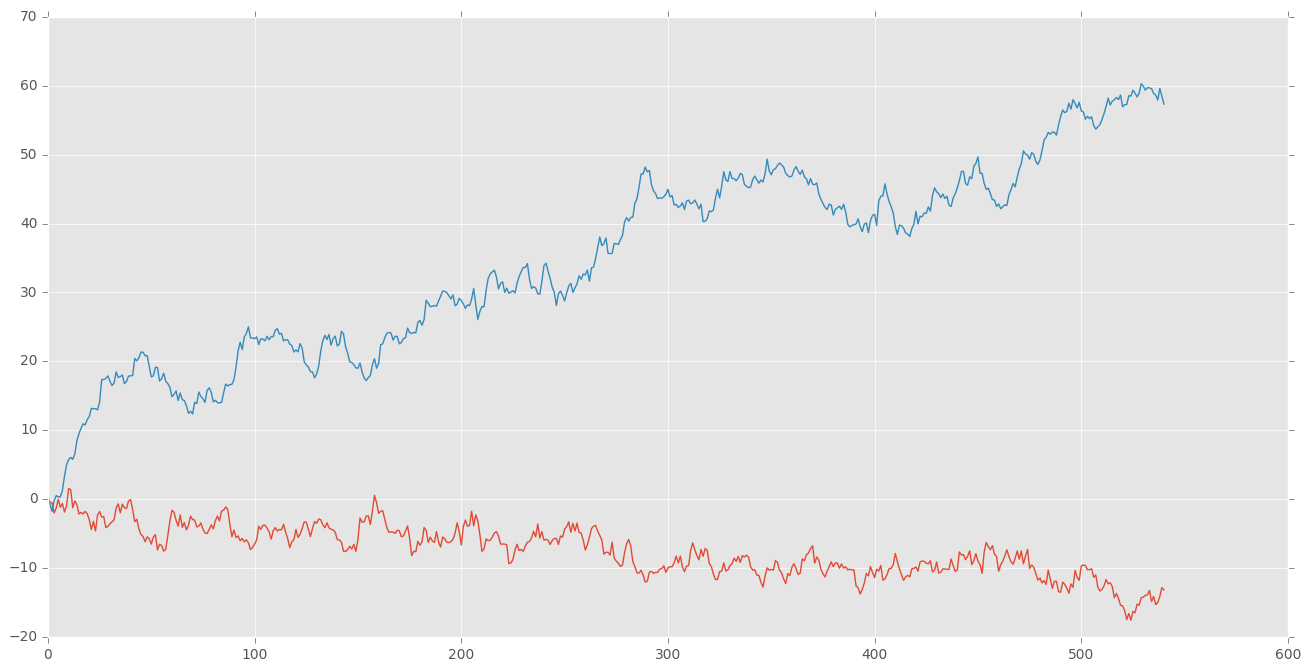

In [410]:
X, beta = dgp2(2, 1, eigen_adjust=0.80)
plt.plot(X)

In [411]:
LB = 400

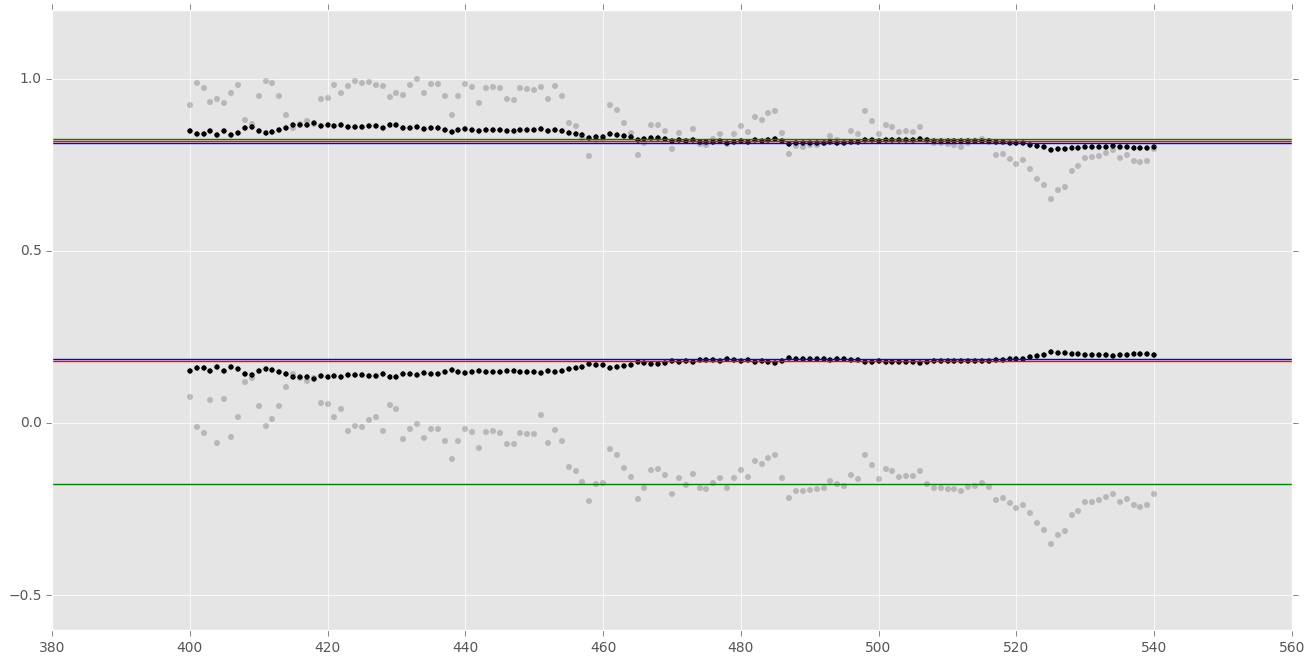

In [412]:
for r in np.arange(LB, X.shape[0]):
    b = johansen(X[np.arange(r-LB, r, 1), :], 2, model=3)
    b /= np.sum(np.abs(b), axis=0)
    plt.scatter([r, r], b[:, 0], c='k')
    plt.scatter([r, r], b[:, 1], c='k', alpha=0.2)

b = johansen(X, 2, model=3)
b /= np.sum(np.abs(b), axis=0)
plt.axhline(b[0, 0])
plt.axhline(b[1, 0])
plt.axhline(b[0, 1], c='green')
plt.axhline(b[1, 1], c='green')

beta /= np.sum(np.abs(beta))
plt.axhline(beta[0], c='r')
plt.axhline(beta[1], c='r')

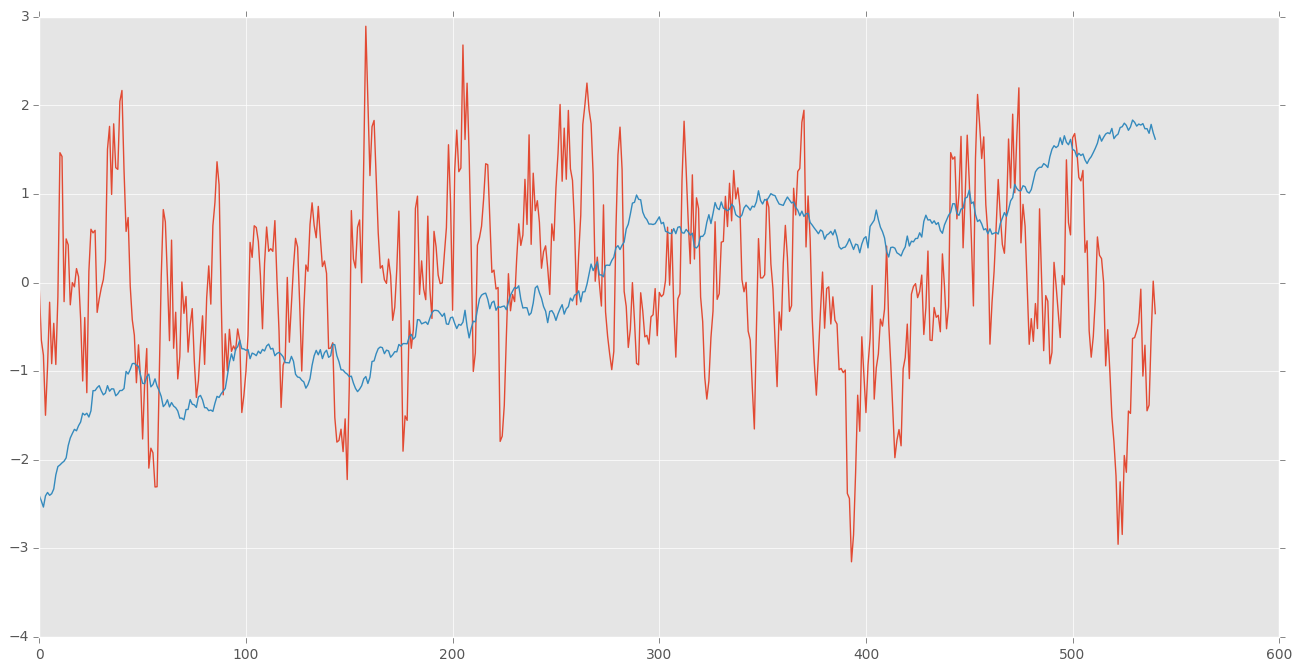

In [413]:
spd = project(X, space=johansen(X, 2, model=3))
plt.plot((spd - np.mean(spd, axis=0)) / np.std(spd, axis=0))

In [395]:
np.corrcoef(X[:, 0], X[:, 1])

array([[ 1.        , -0.81333353],
       [-0.81333353,  1.        ]])

In [188]:
def splined(df, interval):
    df['elapsed'] = df.index.values - df.index.values[0]
    df['elapsed_seconds'] = df['elapsed'].astype(int) / 1000000000

    time_range = np.arange(0, df.elapsed_seconds.max(), interval)
    tgt_interpolated = interpolate.interp1d(df.elapsed_seconds, (df.bp1 + df.lp1) / 2., kind='zero')(time_range)

    return interpolate.UnivariateSpline(time_range, tgt_interpolated, k=3, s=1)(time_range)